Number of estimated clusters: 3
Cluster centers:
[[-1.53974585 -1.47516018]
 [ 0.46123344 -0.89407227]
 [ 0.89645101  0.75941896]]


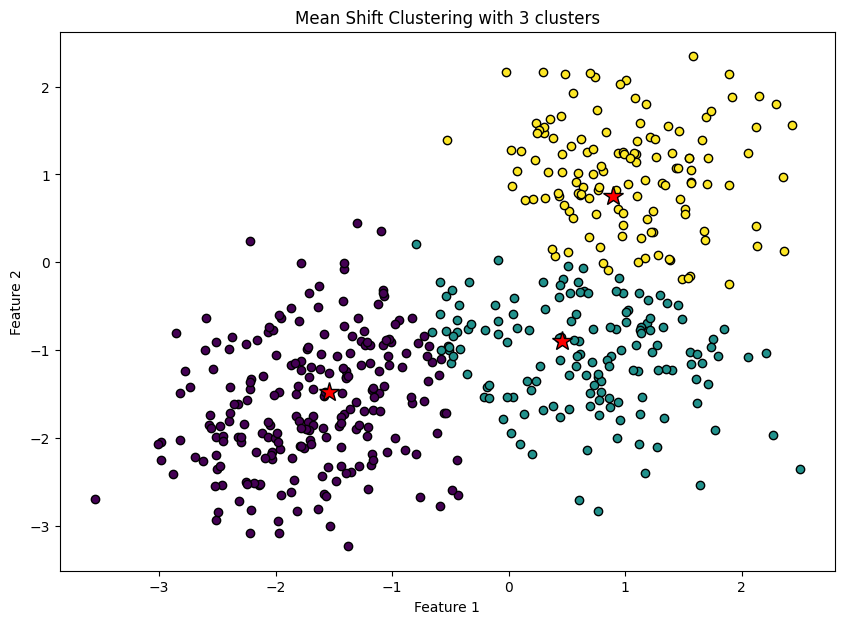

In [2]:
##Code copied from google

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# 1. Generate sample data
centers = [[1, 1], [-1, -1], [1, -1], [-2, -2]]
X, _ = make_blobs(n_samples=500, centers=centers, cluster_std=0.6, random_state=0)

# 2. Estimate the bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# 3. Initialize and fit the Mean Shift model
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# 4. Get the cluster labels and centers
labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))
print(f"Number of estimated clusters: {n_clusters_}")
print(f"Cluster centers:\n{cluster_centers}")

# 5. Visualize the results
plt.figure(figsize=(10, 7))
colors = plt.cm.viridis(np.linspace(0, 1, n_clusters_))
for k, col in enumerate(colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
    plt.plot(cluster_center[0], cluster_center[1], '*', markerfacecolor='red',
             markeredgecolor='k', markersize=15)

plt.title(f"Mean Shift Clustering with {n_clusters_} clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


